<a href="https://colab.research.google.com/github/Jain-Tirth/ds_Jain_Tirth/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
historical_data = pd.read_csv('historical_data.csv')
sentiment_data = pd.read_csv('fear_greed_index.csv')
display(sentiment_data.head())
display(historical_data.head())

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
display(historical_data.info())
display(sentiment_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Start Position    211224 non-null  float64       
 7   Direction         211224 non-null  object        
 8   Closed PnL        211224 non-null  float64       
 9   Transaction Hash  211224 non-null  object        
 10  Order ID          211224 non-null  int64         
 11  Crossed           211224 non-null  bool          
 12  Fee               211224 non-null  float64       
 13  Trade ID          211224 non-null  float64       
 14  date

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   value           2644 non-null   int64         
 1   classification  2644 non-null   object        
 2   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 62.1+ KB


None

In [ ]:
display(historical_data.describe())
display(sentiment_data.describe())

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,date
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,211224
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,2025-01-30 23:54:28.674013952
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,2023-05-01 00:00:00
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,2024-12-31 00:00:00
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,2025-02-24 00:00:00
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,2025-04-02 00:00:00
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,2025-05-01 00:00:00
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,NaN


,value,date
count,2644.000000,2644
mean,46.981089,2021-09-17 11:44:45.022692864
min,5.000000,2018-02-01 00:00:00
25%,28.000000,2019-11-26 18:00:00
50%,46.000000,2021-09-17 12:00:00
75%,66.000000,2023-07-10 06:00:00
max,95.000000,2025-05-02 00:00:00
std,21.827680,NaN


## Checking for the missing values

In [ ]:
historical_data.isnull().any()

,0
Account,False
Coin,False
Execution Price,False
Size Tokens,False
Size USD,False
Side,False
Timestamp IST,False
Start Position,False
Direction,False
Closed PnL,False


In [ ]:
for cols in historical_data.columns:
    unique_val = historical_data[cols].unique()
    print(f"Unique value of {cols}\n {historical_data[cols].unique()}")
    if '?' in unique_val:
        print(f"Detected unusual value in {cols}")

Unique value of Account
 ['0xae5eacaf9c6b9111fd53034a602c192a04e082ed'
 '0x72c6a4624e1dffa724e6d00d64ceae698af892a0'
 '0x513b8629fe877bb581bf244e326a047b249c4ff1'
 '0x083384f897ee0f19899168e3b1bec365f52a9012'
 '0x430f09841d65beb3f27765503d0f850b8bce7713'
 '0x8381e6d82f1affd39a336e143e081ef7620a3b7f'
 '0x4f93fead39b70a1824f981a54d4e55b278e9f760'
 '0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4'
 '0x420ab45e0bd8863569a5efbb9c05d91f40624641'
 '0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23'
 '0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd'
 '0x6d6a4b953f202f8df5bed40692e7fd865318264a'
 '0xbaaaf6571ab7d571043ff1e313a9609a10637864'
 '0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb'
 '0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891'
 '0xa0feb3725a9335f49874d7cd8eaad6be45b27416'
 '0x8477e447846c758f5a675856001ea72298fd9cb5'
 '0x8170715b3b381dffb7062c0298972d4727a0a63b'
 '0x47add9a56df66b524d5e2c1993a43cde53b6ed85'
 '0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6'
 '0x28736f43f1e871e6aa8b1148d38d4994275d72c4'
 '0x39cef

## Converting the timestamp to datetime datatype

In [4]:
print(sentiment_data.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [5]:
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_data.drop('Timestamp', axis = 1, inplace = True)
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
sentiment_data.drop('timestamp', axis = 1, inplace=True)

print("Historical Data Info:")
historical_data.info()
print("\nHistorical Data Head:")
display(historical_data.head())

print("\nSentiment Data Info:")
sentiment_data.info()
print("\nSentiment Data Head:")
display(sentiment_data.head())

Historical Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60460 entries, 0 to 60459
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           60460 non-null  object        
 1   Coin              60460 non-null  object        
 2   Execution Price   60460 non-null  float64       
 3   Size Tokens       60460 non-null  float64       
 4   Size USD          60460 non-null  float64       
 5   Side              60460 non-null  object        
 6   Timestamp IST     60460 non-null  datetime64[ns]
 7   Start Position    60460 non-null  float64       
 8   Direction         60460 non-null  object        
 9   Closed PnL        60460 non-null  float64       
 10  Transaction Hash  60460 non-null  object        
 11  Order ID          60460 non-null  int64         
 12  Crossed           60460 non-null  bool          
 13  Fee               60459 non-null  float64       
 14  

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15



Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   value           2644 non-null   int64         
 1   classification  2644 non-null   object        
 2   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 62.1+ KB

Sentiment Data Head:


,value,classification,date
0,30,Fear,2018-02-01
1,15,Extreme Fear,2018-02-02
2,40,Fear,2018-02-03
3,24,Extreme Fear,2018-02-04
4,11,Extreme Fear,2018-02-05


## Merge datasets


In [6]:
historical_data['date'] = historical_data['Timestamp IST'].dt.date
historical_data.drop('Timestamp IST', axis = 1, inplace = True)
historical_data['date'] = pd.to_datetime(historical_data['date'])

In [7]:
merged_data = pd.merge(historical_data, sentiment_data, on='date', how='left')
print("Merged Data Head:")
display(merged_data.head())
print("\nMerged Data Info:")
merged_data.info()

Merged Data Head:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-12-02,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-12-02,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-12-02,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-12-02,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-12-02,80.0,Extreme Greed



Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60460 entries, 0 to 60459
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           60460 non-null  object        
 1   Coin              60460 non-null  object        
 2   Execution Price   60460 non-null  float64       
 3   Size Tokens       60460 non-null  float64       
 4   Size USD          60460 non-null  float64       
 5   Side              60460 non-null  object        
 6   Start Position    60460 non-null  float64       
 7   Direction         60460 non-null  object        
 8   Closed PnL        60460 non-null  float64       
 9   Transaction Hash  60460 non-null  object        
 10  Order ID          60460 non-null  int64         
 11  Crossed           60460 non-null  bool          
 12  Fee               60459 non-null  float64       
 13  Trade ID          60459 non-null  float64       
 14  dat

## Univariate Analysis

In [ ]:
cat_cols = historical_data.select_dtypes(include='object')
cat_cols

,Account,Coin,Side,Timestamp IST,Direction,Transaction Hash
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,02-12-2024 22:50,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,02-12-2024 22:50,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,02-12-2024 22:50,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,02-12-2024 22:50,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,BUY,02-12-2024 22:50,Buy,0xec09451986a1874e3a980418412fcd0201f500c95bac...
...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,25-04-2025 15:35,Close Long,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,25-04-2025 15:35,Close Long,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,25-04-2025 15:35,Close Long,0x0780085b0c0a943eea800422374d920204c100edf579...
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,SELL,25-04-2025 15:35,Close Long,0x349c29934913b25c89e20422374d920204cd008b8a0e...


In [ ]:
num_cols = historical_data.select_dtypes(include=['int64', 'float64'])
num_cols

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
0,7.9769,986.87,7872.16,0.000000,0.0000,52017706630,0.345404,8.950000e+14,1.730000e+12
1,7.9800,16.00,127.68,986.524596,0.0000,52017706630,0.005600,4.430000e+14,1.730000e+12
2,7.9855,144.09,1150.63,1002.518996,0.0000,52017706630,0.050431,6.600000e+14,1.730000e+12
3,7.9874,142.98,1142.04,1146.558564,0.0000,52017706630,0.050043,1.080000e+15,1.730000e+12
4,7.9894,8.73,69.75,1289.488521,0.0000,52017706630,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...
211219,1.1010,382.20,420.80,7546.600000,-20.2566,88803313862,0.042080,1.990000e+14,1.750000e+12
211220,1.1010,2124.10,2338.63,7164.400000,-112.5773,88803313862,0.233863,9.260000e+14,1.750000e+12
211221,1.1010,423.40,466.16,5040.300000,-22.4402,88803313862,0.046616,6.930000e+14,1.750000e+12
211222,1.1010,3599.80,3963.38,4616.900000,-190.7894,88803313862,0.396337,4.180000e+14,1.750000e+12


In [ ]:
bool_cols = historical_data.select_dtypes(include='bool')
bool_cols

,Crossed
0,True
1,True
2,True
3,True
4,True
...,...
211219,False
211220,False
211221,False
211222,False


## Analyze trader performance by sentiment


In [ ]:
pnl_by_sentiment = merged_data.groupby('classification')['Closed PnL'].mean()
display(pnl_by_sentiment)

,Closed PnL
classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


## Identify patterns

Identify patterns in trading behavior and outcomes under different market sentiment conditions.


In [ ]:
sentiment_numerical_stats = merged_data.groupby('classification')[num_cols.columns].agg(['mean', 'median', 'std'])
display(sentiment_numerical_stats)

for col in ['Side', 'Direction']:
    print(f"\nDistribution of {col} by Sentiment Classification:")
    display(merged_data.groupby('classification')[col].value_counts(normalize=True).unstack())

print("\nFrequency of Crossed Trades by Sentiment Classification:")
display(merged_data.groupby('classification')['Crossed'].value_counts(normalize=True).unstack())

Execution Price                        Size Tokens         \
                          mean  median           std         mean median   
classification                                                             
Extreme Fear       7054.795108  16.176  22281.739294  1675.893319  37.44   
Extreme Greed      6082.195865  18.250  23201.177889  8832.415746  42.64   
Fear              14152.620222  16.584  31644.432937  2992.641845  30.01   
Greed             13411.276344  20.539  31515.317080  4715.327756  30.30   
Neutral           12393.692779  22.102  31286.444034  4383.368714  25.02   

                                  Size USD                         \
                          std         mean   median           std   
classification                                                      
Extreme Fear     52956.092494  5349.731843  766.150  22306.826180   
Extreme Greed   159554.358234  3112.251565  500.050  11061.998403   
Fear             66991.214369  7816.109931  735.960  51914.859249   
Greed           114948.581317  5736.884375  555.000  30533.418602   
Neutral          85469.197541  4782.732661  547.655  37461.883466   

               Start Position  ...      Order ID       Fee            \
                         mean  ...           std      mean    median   
classification                 ...                                     
Extreme Fear     -2322.304587  ...  5.486336e+09  1.116291  0.117887   
Extreme Greed    19518.990812  ...  1.332764e+10  0.675902  0.057181   
Fear              8709.824822  ...  8.745704e+09  1.495172  0.116153   
Greed          -151088.546635  ...  2.442913e+10  1.254372  0.084055   
Neutral            144.002263  ...  1.142899e+10  1.044798  0.089902   

                              Trade ID                              \
                     std          mean        median           std   
classification                                                       
Extreme Fear    5.200561  5.634953e+14  5.620000e+14  3.247655e+14   
Extreme Greed   2.971016  5.584085e+14  5.560000e+14  3.258622e+14   
Fear            8.484861  5.655492e+14  5.660000e+14  3.248887e+14   
Greed           6.374833  5.620578e+14  5.610000e+14  3.266852e+14   
Neutral         7.647710  5.638288e+14  5.630000e+14  3.263366e+14   

                   Timestamp                              
                        mean        median           std  
classification                                            
Extreme Fear    1.739872e+12  1.740000e+12  1.532384e+09  
Extreme Greed   1.731075e+12  1.730000e+12  7.597579e+09  
Fear            1.740655e+12  1.740000e+12  4.207311e+09  
Greed           1.736266e+12  1.740000e+12  1.301571e+10  
Neutral         1.740813e+12  1.740000e+12  5.428901e+09  

[5 rows x 27 columns]


Distribution of Side by Sentiment Classification:


Side,BUY,SELL
classification,,
Extreme Fear,0.510981,0.489019
Extreme Greed,0.448590,0.551410
Fear,0.489513,0.510487
Greed,0.488559,0.511441
Neutral,0.503343,0.496657



Distribution of Direction by Sentiment Classification:


Direction,Auto-Deleveraging,Buy,Close Long,Close Short,Liquidated Isolated Short,Long > Short,Open Long,Open Short,Sell,Settlement,Short > Long,Spot Dust Conversion
classification,,,,,,,,,,,,
Extreme Fear,NaN,0.037710,0.291636,0.145654,NaN,0.000234,0.327336,0.148318,0.048692,NaN,0.000280,0.000140
Extreme Greed,NaN,0.128326,0.179686,0.162457,NaN,0.000175,0.157532,0.191613,0.179136,NaN,0.000275,0.000800
Fear,NaN,0.051862,0.279121,0.149118,NaN,0.000226,0.288242,0.176060,0.054401,NaN,0.000291,0.000679
Greed,0.000159,0.093136,0.158996,0.225076,0.00002,0.000318,0.169851,0.231875,0.118999,0.00002,0.000457,0.001093
Neutral,NaN,0.076554,0.265165,0.155230,NaN,0.000398,0.271241,0.168577,0.062251,NaN,0.000318,0.000265



Frequency of Crossed Trades by Sentiment Classification:


Crossed,False,True
classification,,
Extreme Fear,0.433037,0.566963
Extreme Greed,0.377776,0.622224
Fear,0.399114,0.600886
Greed,0.385524,0.614476
Neutral,0.381229,0.618771


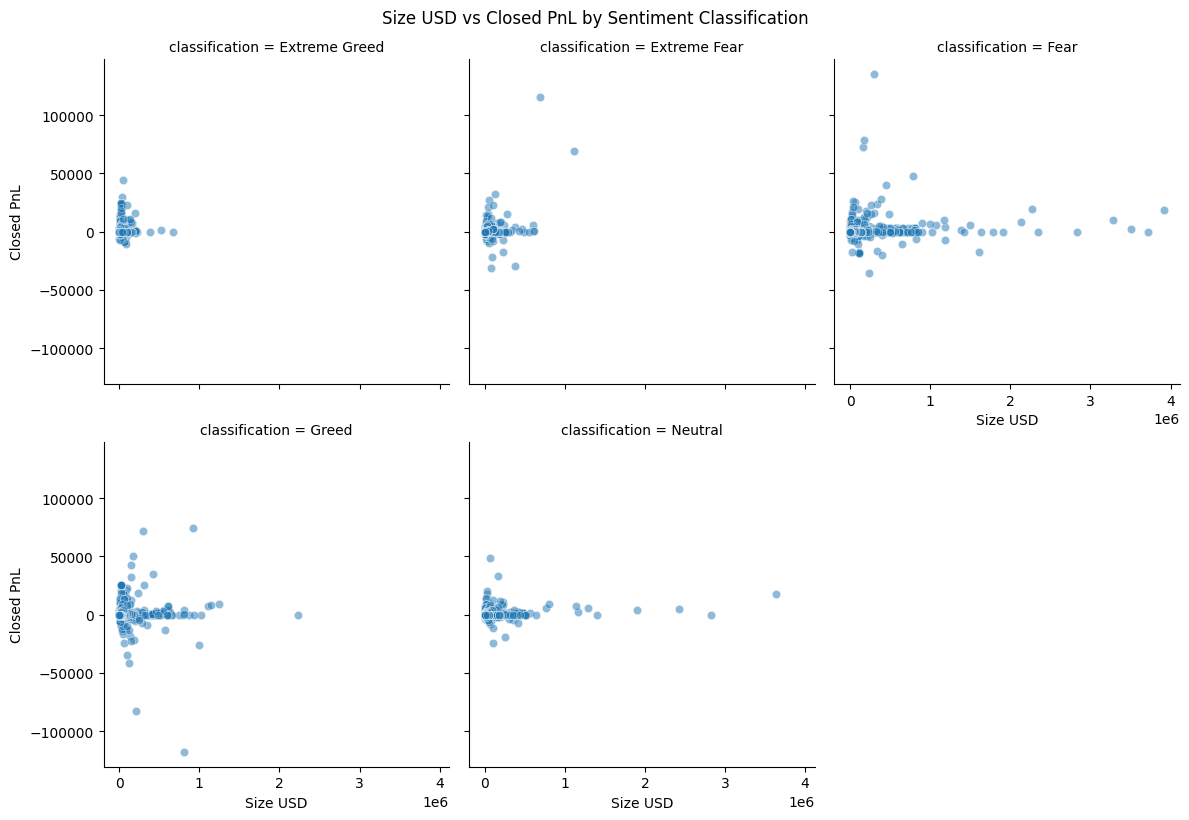

In [ ]:
g = sns.FacetGrid(merged_data, col="classification", col_wrap=3, height=4)
g.map(sns.scatterplot, "Size USD", "Closed PnL", alpha=0.5)
g.fig.suptitle('Size USD vs Closed PnL by Sentiment Classification', y=1.02)
plt.show()

## Visualize findings


/tmp/ipython-input-3999346435.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis')


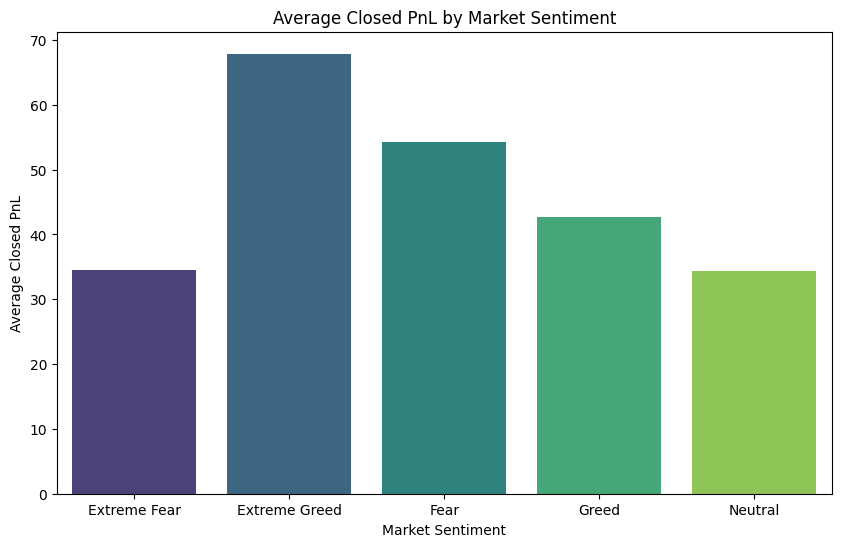

/tmp/ipython-input-3999346435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='classification', y=feature, data=merged_data, palette='viridis')


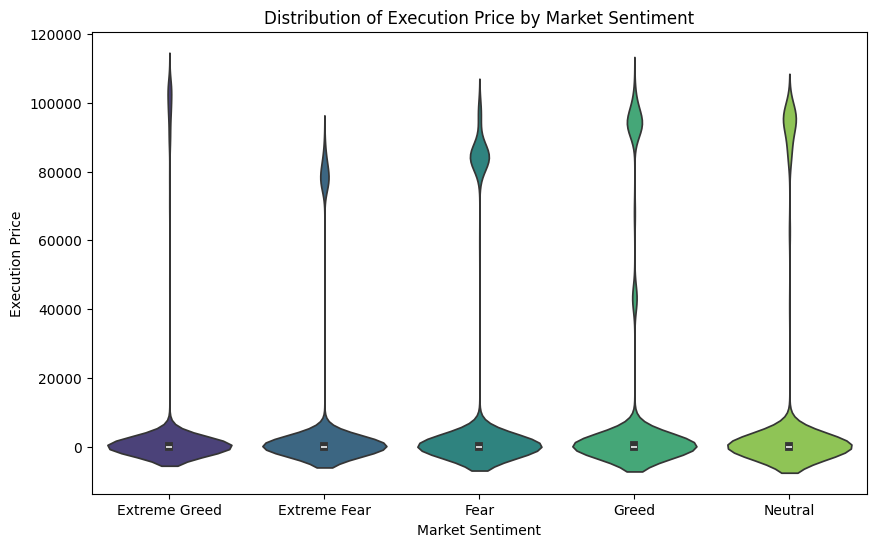

/tmp/ipython-input-3999346435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='classification', y=feature, data=merged_data, palette='viridis')


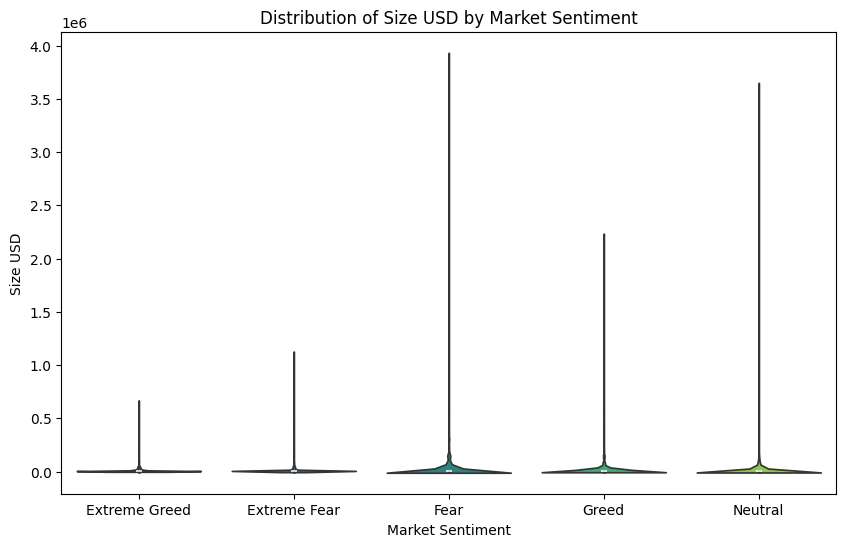

/tmp/ipython-input-3999346435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='classification', y=feature, data=merged_data, palette='viridis')


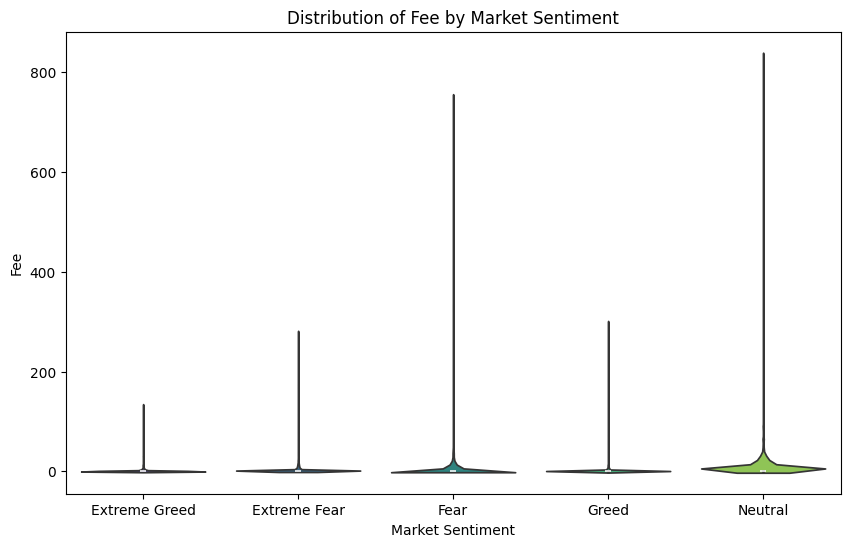

/tmp/ipython-input-3999346435.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='classification', y=feature, data=merged_data, palette='viridis')


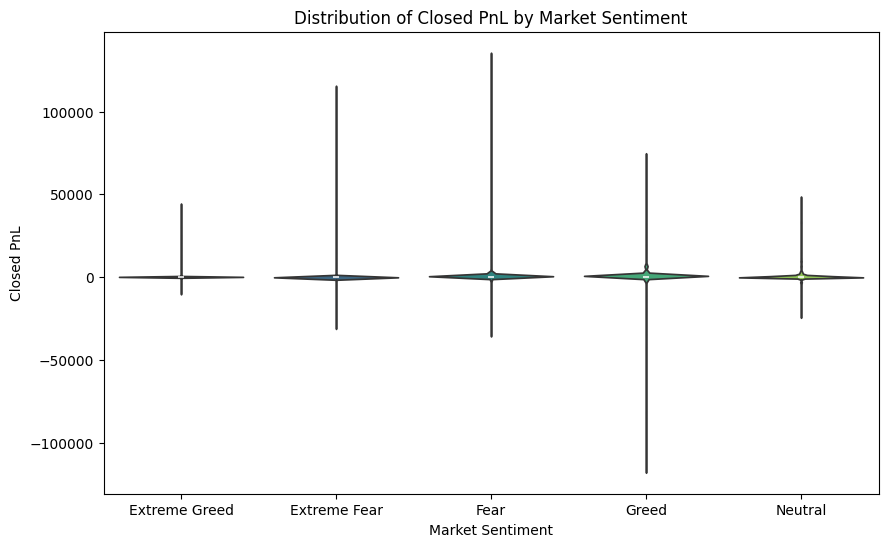

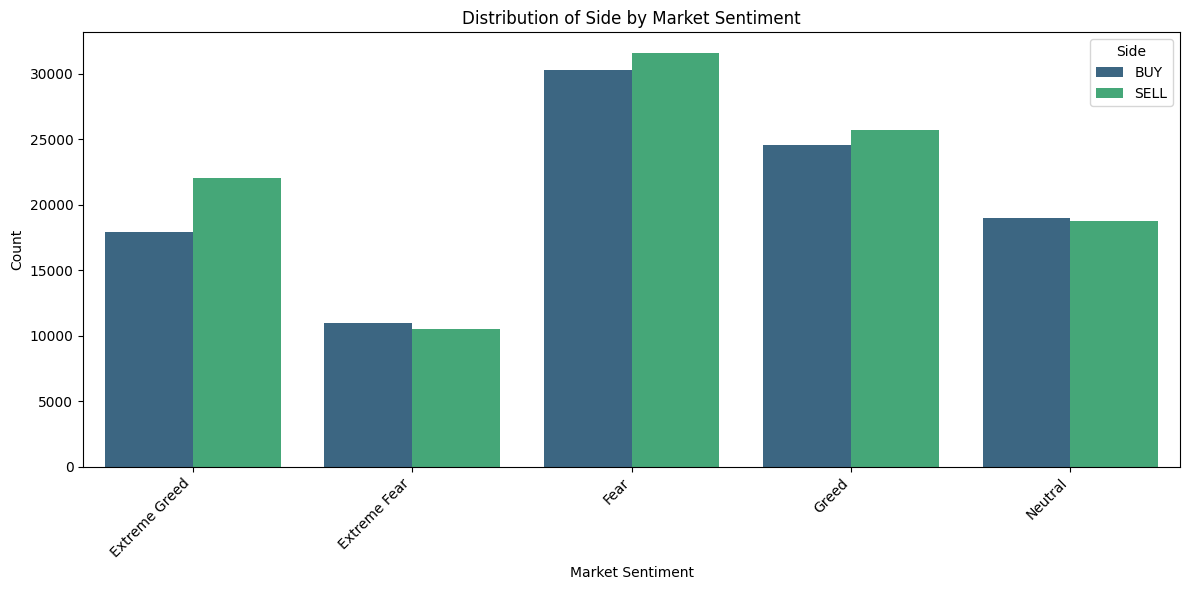

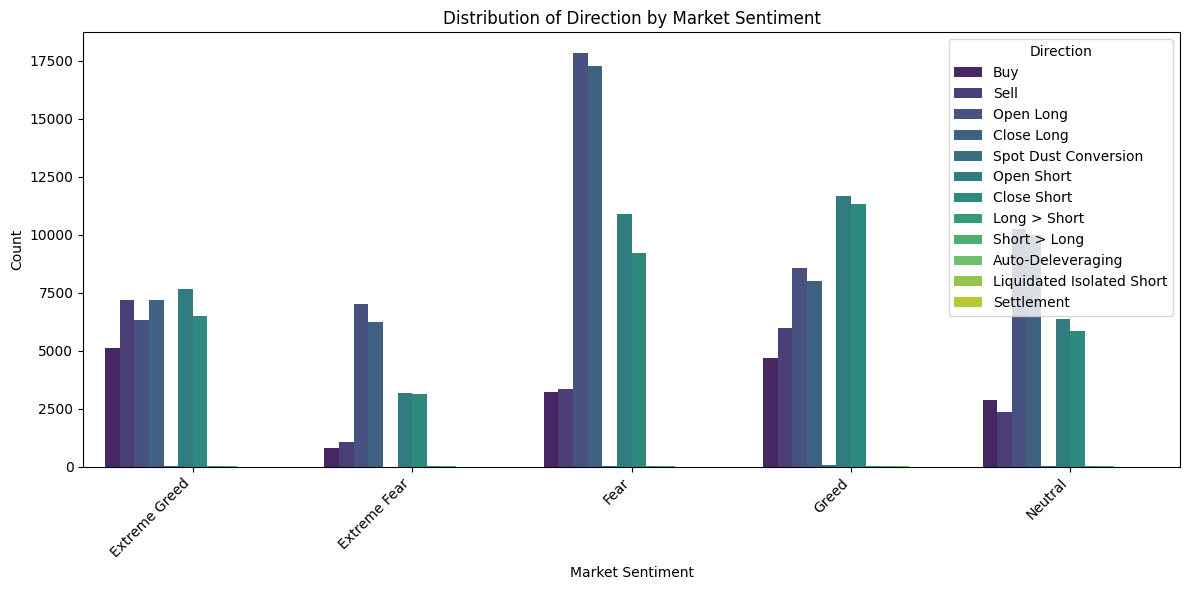

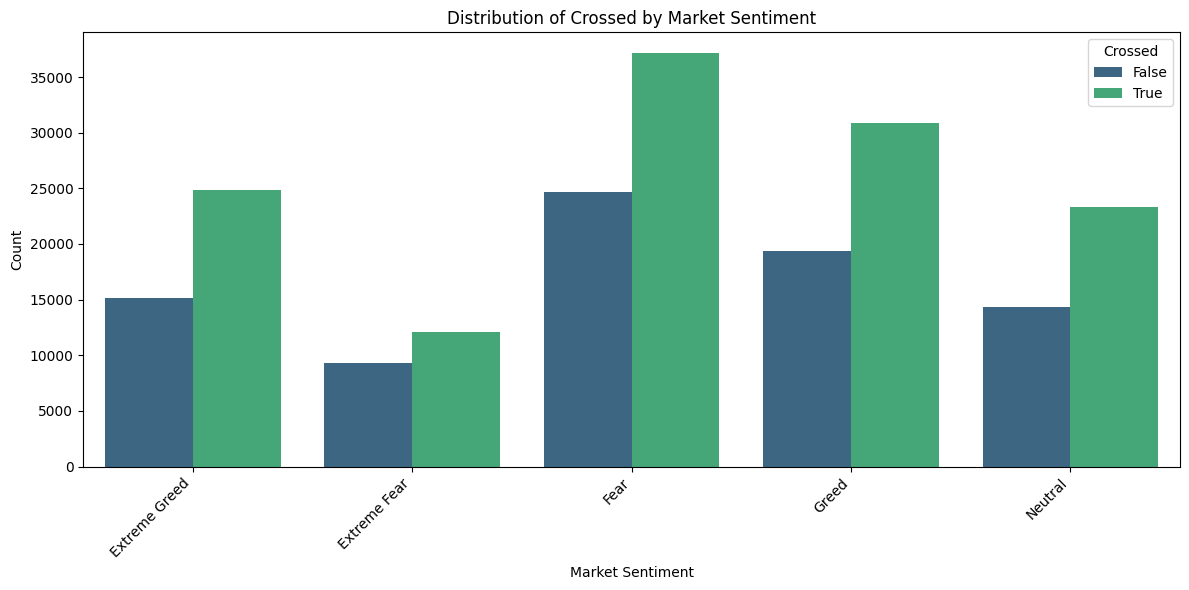

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pnl_by_sentiment.index, y=pnl_by_sentiment.values, palette='viridis')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.title('Average Closed PnL by Market Sentiment')
plt.show()

numerical_features = ['Execution Price', 'Size USD', 'Fee', 'Closed PnL']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='classification', y=feature, data=merged_data, palette='viridis')
    plt.xlabel('Market Sentiment')
    plt.ylabel(feature)
    plt.title(f'Distribution of {feature} by Market Sentiment')
    plt.show()

categorical_features = ['Side', 'Direction', 'Crossed']
for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.countplot(x='classification', hue=feature, data=merged_data, palette='viridis')
    plt.xlabel('Market Sentiment')
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature} by Market Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Summarize insights

### Subtask:
Summarize the key findings and provide insights for smarter trading strategies based on the analysis.


In [9]:
# Define winning and losing trades
merged_data['is_win'] = merged_data['Closed PnL'] > 0
merged_data['is_loss'] = merged_data['Closed PnL'] < 0

performance_by_sentiment = merged_data.groupby('classification').apply(
    lambda df: pd.Series({
        'Win Rate (%)': 100 * df['is_win'].mean(),
        'Avg Winning Trade Size (USD)': df.loc[df['is_win'], 'Size USD'].mean(),
        'Avg Losing Trade Size (USD)': df.loc[df['is_loss'], 'Size USD'].mean(),
        'Avg Closed PnL (Win)': df.loc[df['is_win'], 'Closed PnL'].mean(),
        'Avg Closed PnL (Loss)': df.loc[df['is_loss'], 'Closed PnL'].mean(),
        'Total Trades': len(df),
        'Winning Trades': df['is_win'].sum(),
        'Losing Trades': df['is_loss'].sum()
    })
).round(2)

display(performance_by_sentiment)


/tmp/ipython-input-1813360596.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  performance_by_sentiment = merged_data.groupby('classification').apply(


,Win Rate (%),Avg Winning Trade Size (USD),Avg Losing Trade Size (USD),Avg Closed PnL (Win),Avg Closed PnL (Loss),Total Trades,Winning Trades,Losing Trades
classification,,,,,,,,
Extreme Fear,38.82,8588.34,4040.42,495.87,-363.46,2532.0,983.0,342.0
Extreme Greed,53.31,5558.95,11530.51,315.08,-374.68,10533.0,5615.0,477.0
Fear,43.71,16238.25,17329.44,287.53,-269.78,17150.0,7496.0,1093.0
Greed,40.51,11272.99,10233.90,235.22,-187.56,18964.0,7683.0,1475.0
Neutral,46.72,12630.51,7819.82,232.77,-223.66,11275.0,5268.0,655.0


## Summary:

### Data Analysis Key Findings

* Periods of "Extreme Greed" showed the highest average Closed PnL (\$67.89), followed by "Fear" (\$54.29) and "Greed" (\$42.74).
* "Extreme Fear" and "Neutral" sentiments were associated with the lowest average Closed PnL (\$34.54 and \$34.31 respectively).
* The distribution of trade sides ('Side') shows a slight tendency towards SELL trades in "Extreme Greed" and "Greed", and towards BUY trades in "Extreme Fear" and "Neutral".
* 'Open Long' and 'Close Short' were the most prevalent trade directions across most sentiment categories. "Extreme Greed" and "Greed" had a higher proportion of 'Open Short' and 'Close Long' trades.
* Crossed trades ('Crossed') were frequent across all sentiment classifications, with "Extreme Greed" and "Neutral" showing the highest percentages.
* Visualizations of 'Size USD' vs 'Closed PnL' did not show a strong linear correlation, but provided a visual representation of PnL distribution across different trade sizes within each sentiment.
* "Extreme Greed" has the highest win rate at 53.31%, indicating a higher percentage of profitable trades during this sentiment.
* "Fear" sentiment shows the highest average winning trade size (\$16238.25 USD), while "Extreme Greed" has the lowest average winning trade size (\$5558.95 USD).
* "Fear" also has the highest average losing trade size (\$17329.44 USD), and "Greed" has the lowest average losing trade size (\$10233.90 USD) amongst Fear, Greed, and Extreme Greed classifications.
